No of samples ~ 4200 | 
No of features ~ 350

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/train.csv").set_index("ID")

There are some features that are constants. Let's identify them by looking at the standard deviation (check id std ==0.0) and then drop those features.

In [3]:
desc = df.describe().transpose()
columns_to_drop = desc.loc[desc["std"]==0].index.values
df.drop(columns_to_drop, axis=1, inplace=True)

Just to check which columns we just dropped:

In [4]:
print(columns_to_drop)

['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297' 'X330'
 'X347']


There are some categorical features in X0-X8. Let's count the cardinality and label encode those.

In [5]:
df08 = df[["X{}".format(x) for x in range(9) if x != 7]]

In [6]:
tot_cardinality = 0
for c in df08.columns.values:
    cardinality = len(df08[c].unique())
    print(c, cardinality)
    tot_cardinality += cardinality
print(tot_cardinality)

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12
X8 25
195


We can do some guesses what these are. Can X3 be the day of week? Can X6 be the months of year?  Let's do the label encoding:

**Update**: Label encoding does not make sense. I'm updating this to One-Hot encoding.

In [7]:
df = pd.get_dummies(df, columns=["X{}".format(x) for x in range(9) if x != 7])

I read somewhere there is an outlier in the target variable. Let's look and remove it.

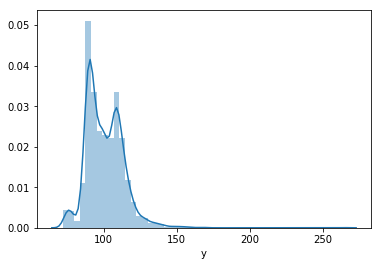

In [8]:
sns.distplot(df.y)

In [9]:
# Drop it!
df.drop(df.loc[df["y"] > 250].index, inplace=True)

## PCA - Principal component analysis.
For the sake of simplicity, do a 2-dimensional PCA. That makes plotting simpler.

In [10]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2_results = pca2.fit_transform(df.drop(["y"], axis=1))

.... and then we plot it as scatter with the target as a color mapping.

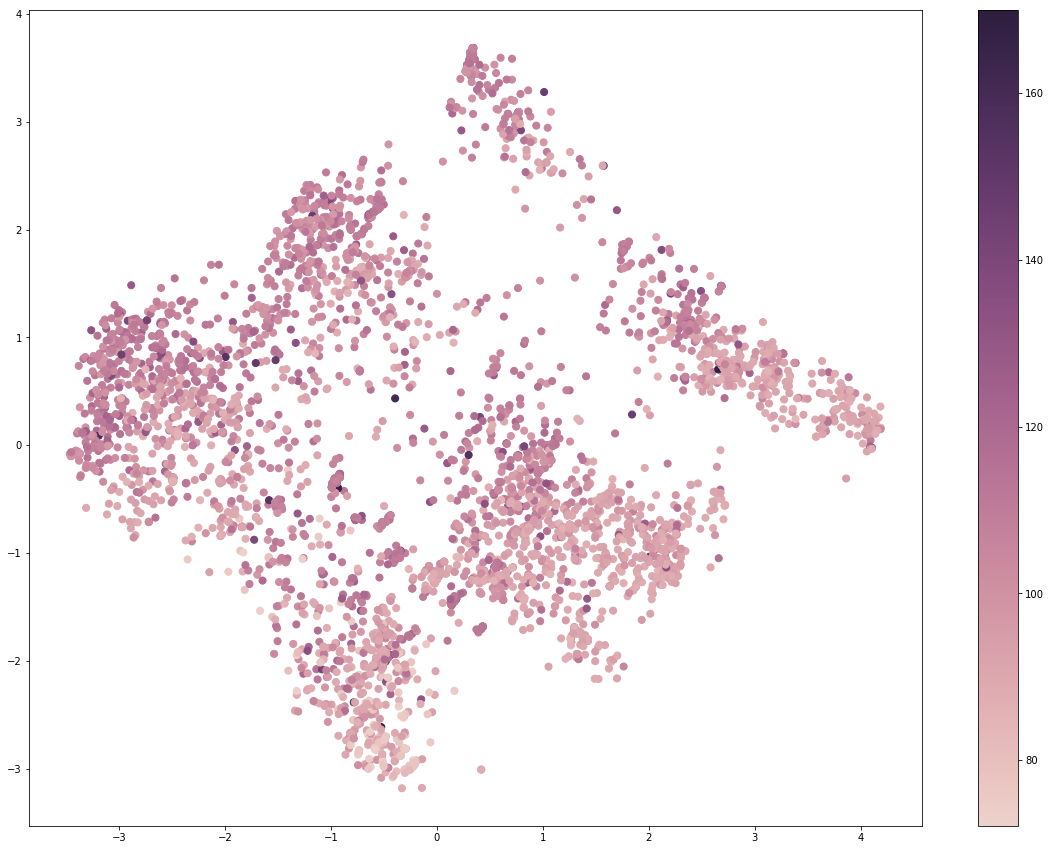

In [11]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results[:,0], pca2_results[:,1], c=df.y, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Interesting.Doesn't it look like some pattern? Why?

## T-SNE  (t-distributed Stochastic Neighbor Embedding)
This is a more modern method of dimensionality reduction.

In [14]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2)
tsne2_results = tsne2.fit_transform(df.drop(["y"], axis=1))

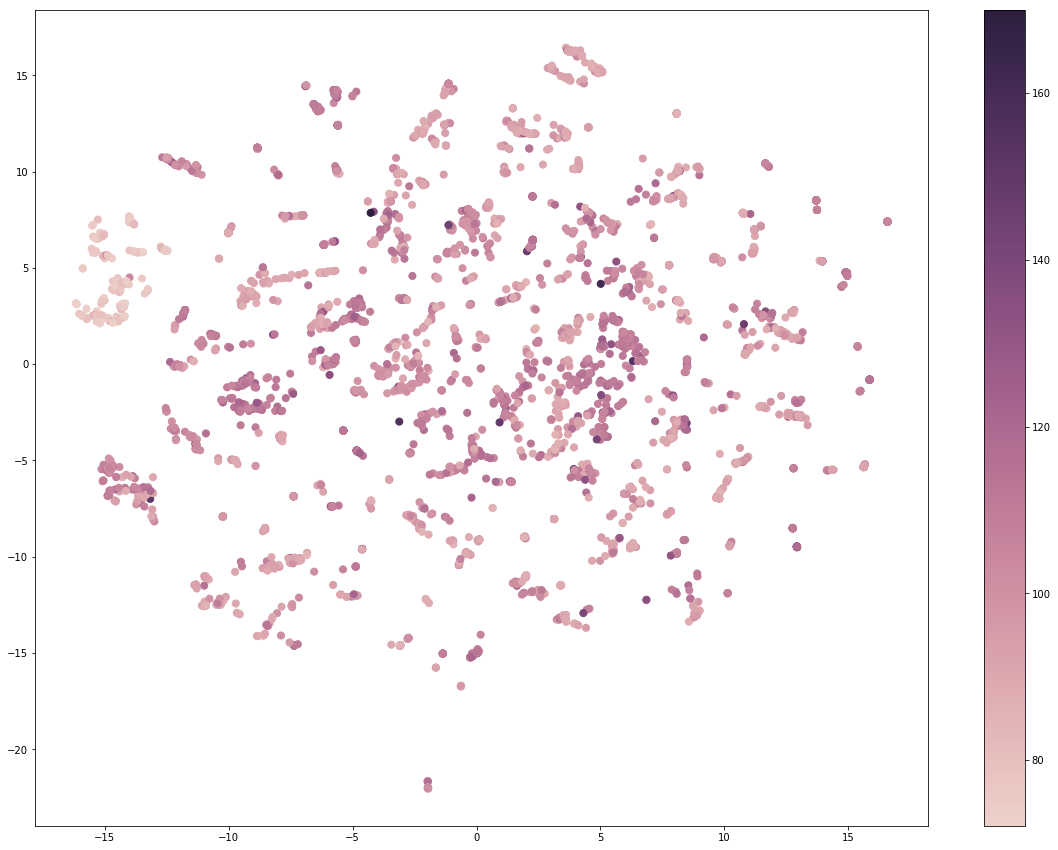

In [15]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne2_results[:,0], tsne2_results[:,1], c=df.y, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Even more interesting! It even looks like we can make some regression out of this set! I'll try that later.
